# Milestone 2
### Extracting the loans data from the cloud

A db_utils.py file is created to contain the code that connects with the AWS RDS cloud engine using the database credentials, extracts the loans data from the cloud and then finally saves the data locally in .csv format. Credentials.yaml file (containing RDS database credentials) is stored locally and ignored by GitHub for security reasons.
<br>
<br>
<ins>*The Python code consists of three parts:*</ins>
 - **load_credentials_file() function.** The function when called returns the credentials information presented in a dictionary format.
 - **class RDSDatabaseConnector.** The class contains *create_engine()* method that creates an engine to connect to the remote dabatase and extract_RDS_data(engine) method that uses that engine to extract the loans data, formats it into Pandas DataFrame and returns it as 'data' variable (where the loans data is contained).
 - **save_to_csv() function.** The function when called the data extracted from the remote RDS database is saved locally in .csv format and named "loan_payments".</ul>
<br>
RDSDatabaseConnector is using the AWS RDS database credentials information, which is locally stored in credentials.yaml file (and ignored by GitHub), to connect with the cloud server and then extract the loans data information for temporary viewing. The *save_to_csv()* function, when called, saves all the loans data locally at the chosen location in order to have easier access to the read, modify and analyse and the data.

In [ ]:
import yaml

def load_credentials_file():
    with open('credentials.yaml', 'r') as f:
        cred = yaml.safe_load(f)
    return cred

credentials = load_credentials_file()

In [ ]:
from db_utils import RDSDatabaseConnector

db_connect = RDSDatabaseConnector(credentials)

engine = db_connect.create_engine()

df = db_connect.extract_RDS_data(engine)

print(df.head())

In [ ]:
def save_to_csv():
    df.to_csv("C:/Users/eveli/ai_core/EDA/loan_payments.csv")
    
save_to_csv()

# Milestone 3
### 1. Load the locally saved loans data.
<br>
The loans data is loaded and stored in a variable called df_raw (short for "raw dataframe").

In [ ]:
import pandas as pd

df_raw = pd.read_csv("C:/Users/eveli/ai_core/EDA/loan_payments.csv")

### 2. Importing classes necessary for the work with the loans dataframe. 

Four classes are imported from separate python files:
 - Class DataTransform: changes the data types of columns that have been assigned with the wrong data type as well as rounds the values in columns to two decimal places.
 - Class DataFrameInfo: provides useful information about the data frame for the purpose of familiarising with the data before the cleaning process. 
 - Class Plotter: provides visual insights of the data.
 - Class DataFrameTransform: contains various methods used for cleaning and transformation of the data frame (such as methods to deal with NaN values, to correct skewness of the data, removal or transformation of outliers and removal of correlated columns)

In [ ]:
from class_data_transform import DataTransform

from class_data_frame_info import DataFrameInfo

from class_plotter import Plotter

from class_data_frame_transform import DataFrameTransform

### 3. Extract insightful information from the data.

Class DataFrameInfo is created to generate useful information about the data which helps us to familiarise ourselves with it. 
<br>
There are seven methods in the class:
 - show_colm_dtypes()
 - show_colm_head()
 - show_colm_tail()
 - show_colm_stat_values()
 - show_categ_colm_values_count()
 - show_df_shape()
 - show_null_percentage()</ul>
<br>
<ins>The first method</ins> (*show_colm_dtypes()*) shown below lists the name of every column in the data frame (including the index column *"Unnamed"* created by pandas), the count of non-null values each column has and, most importantly, what data type each column is assigned. This information helps us to establish whether any of the columns were assigned with the wrong data type. 

In [ ]:
info = DataFrameInfo(df_raw)

info.show_colm_dtypes()

<ins>The second method</ins> (*show_colm_head()*) shows the values of the top 25 rows of each column (categorical data columns are excluded).

In [ ]:
info.show_colm_head()

<ins>The third method</ins> (*show_colm_tail()*) shows the values of the bottom 25 rows of each column (categorical data columns are excluded).

In [ ]:
info.show_colm_tail()

<ins>The fourth method</ins> (*show_colm_stat_values()*) generates statistical values such as mean, standard deviation, count of data entries, min & max values as well as 25/50/75 percentiles for each column (includes only the columns containing continuous values).  

In [ ]:
info.show_colm_stat_values() 

<ins>The fifth method</ins> (*show_categ_colm_values_count()*) shows the count of data entries for each value in categorical columns (the columns containing categorical data). 
<br>
This helps to group the data entries of each column into groups for better insight. 

In [ ]:
info.show_categ_colm_values_count() 

<ins>The sixth method</ins> (*show_df_shape()*) shows the shape of the data frame. In this case, the shape of our data frame is (54231, 44) meaning it contains 44 columns and 54231 rows. 

In [ ]:
info.show_df_shape()

<ins>The last (seventh) method</ins> (*show_null_percentage()*) shows the percentage of null values in each column. This information will be essential in finding out which columns contains null values and based on the percentage of null values, in choosing which cleaning method is more appropriate in dealing with the null values. 

In [ ]:
info.show_null_percentage()

### 4. Convert columns to the correct data format and organise column values.
After using class DataFrameInfo to analyse the given raw data, it was noticed that some of the columns could be assigned with better data format as well as some values in columns could be grouped in a more efficient manner. For this purpose class DataTransform was created. 
<br>
<br>
There are three methods in the class:

 - change_to_int()
 - object_to_datetime()
 - round_values()
 - organise_values()</ul>
<br>
<ins>The first method</ins> (*change_to_int()*) transforms "funded_amount_inv" and "annual_inc" columns from float ('float64') to integer ('int64') data type as the data in these columns only consists of integer values. There are other columns such as "funded_amount", "mths_since_last_delinq", mths_since_last_record", "collections_12_mths_ex_med", "mths_since_last_major_derog" and "term" that could benefit with this exact transformation as well however since they contain Nan values, the transformation would be returned with ValueError error. This is because NaN values are not considered valid integers, and therefore cannot be converted to integers.
<br>
<br>
<ins>The second method</ins> (*change_to_datetime()*) transforms "issue_date", "earliest_credit_line", "last_payment_date", "next_payment_date" and "last_credit_pull_date" columns from string ('object') to datetime ('datetime64') data type as the data in these columns represents dates. 
<br>
<br>
<ins>The third method</ins> (*round_values()*) rounds the values in "total_rec_late_fee" and "collection_recovery_fee" columns by two decimal values as the values represents a monetary value which by convention is expressed only up to two decimal values (for example, 22.23 value meaning 22 pounds and 23 pence).
<br>
<br>
<ins>The fourth method</ins> (*organise_values()*) organises the values in "term", "loan_status" and "verification_status" columns in a more efficient manner. In "term" column "36 months" values are replaced with "36" and "60 months" values with "60". Eliminating the "months" word will allow the column's data type to be changed from object to integer once the Nan values will be dealt with. In "loan_status" column "Does not meet the credit policy. Status:Charged Off" values are replaced with "Charged Off" and "Does not meet the credit policy. Status:Fully Paid" values are replaced with "Fully Paid" values. This helps to group the values better avoiding to have several values with different names but meaning the same thing. Finally, in "verification_status" column "Source Verified" values are replaced with "Verified" values in order to group the values into two categories ("Verified" and "Not Verified") rather than three categories ("Source Verified", "Verified" and "Not Verified").
<br>
<br>
After all the class methods are called, we use *show_colm_dtypes()* method from class DataFrameInfo to check if the data types of the columns were successfully changed and *.value_counts()* method for "term", "loan_status" and "verification_status" columns to check whether the values in these columns have been replaced correctly. 


In [ ]:
transform = DataTransform(df_raw)

columns_list = ["funded_amount_inv", "annual_inc"]
for column in columns_list:
    transform.change_to_int(column)

col_list = ["issue_date", "earliest_credit_line", "last_payment_date", "next_payment_date", "last_credit_pull_date"]
for column in col_list:
    transform.change_to_datetime(column)

colmn_list = ["total_rec_late_fee", "collection_recovery_fee"]
for column in colmn_list:
    transform.round_values(column)
    
transform.organise_values()

info.show_colm_dtypes()

columns = ["term", "loan_status", "verification_status"]
for column in columns:
    print(f'{df_raw[column].value_counts()} \n')


### 5. Remove or impute missing values in the data.

Missing values in the dataset are a common phenomenon (especially in a large dataset like the current one) and it can be caused by errors in data collections, respondents not providing information or/and observations not being recorded. It is essential to deal with missing values (expressed in the dataset as 'Nan') as leaving them would make it hard to analyse the data (due to reasons such as creating biased results or many machine algoriths not being able to parse null values).

We will be using the class Plotter to visualise the Nan values and in this way identify in which columns they are present as well as class DataFrameTransform which will be dealing with the missing values by either imputing or removing them. 

By calling *null_values* (a method from class Plotter) we can see the percentage of Nan values that consists in each column and then a graphical representation of this. 

In [ ]:
visuals = Plotter(df_raw)

null_values = visuals.show_null_values()

This shows us that 11 columns contain Nan values:

 - "funded_amount" (5.5%)
 - "term" (8.8%)
 - "int_rate" (9.5%)
 - "employment_length" (3.9%)
 - "mths_since_last_delinq" (57.2%)
 - "mths_since_last_record" (88.6%)
 - "last_payment_date" (0.13%)
 - "next_payment_date" (60.1%)
 - "last_credit_pull_date" (0.01%)
 - "collections_12_mths_ex_med" (0.09%)
 - "mths_since_last_major_derog" (86.2%)</ul>
<br> 
Columns containing continuous data such as "funded_amount" and "int_rate" have just under 10% of Nan values. This number is too large to apply dropping rows (that contains Nan values) method and too small to just drop the entire columns, which means the Nan values will need to be imputed instead. The Nan values can be imputed with mean if the data is normally distributed or with median if the data is skewed. We will call the class Plotter *test_normal_distribution()* method to test the normal distribution and see the graphical illustration of the distribution for these two columns

In [ ]:
nd_columns = ["funded_amount", "int_rate"]
for colm in nd_columns:
    visuals.test_normal_distribution(colm)

From the graphs above we can see the data in "funded_amount" and "int_rate" columns is skewed therefore we will impute the Nan values with the median rather than the mean. This can be done by calling *impute_with_median()* method from class DataFrameTransform.

In [ ]:
df_transform = DataFrameTransform(df_raw)

median_columns = ["funded_amount", "int_rate"]
for column in median_columns:
    df_transform.impute_with_median(column)

The output produced by the method above states that both "funded_amount" and "int_rate" columns contain 54231 of non-null values which is the total number of rows contained in each column. This proves that Nan values in these columns have been dealt with. 
<br>
<br>
Since "term" and "employment_length" are categorical columns and also have relatively high percentage of Nan values (8.8% and 3.9% respectively), we should not drop the rows with Nan values (as this will make us lose quite significant amount of data) but instead impute them with mode (mean or median should only be used for continuous data). This can be done by calling *impute_with_mode()* method from class DataFrameTransform.

In [ ]:
mode_columns = ["term", "employment_length"]
for mod_column in mode_columns:
    df_transform.impute_with_mode(mod_column)

Once again the output produced by the method above states that "term" and "employment_length" columns contain 54231 of non-null values. This proves that Nan values in these columns have been dealt with. 
<br>

The "last_payment_date", "last_credit_pull_date" and "collections_12_mths_ex_med" columns contain less or equal to 0.1% of Nan values. As the percentage is so small, it is safe to drop the rows containing Nan values for these columns. This can be done by calling *drop_rows()* method from class DataFrameTransform. 

In [ ]:
row_drop_columns = ["last_payment_date", "last_credit_pull_date", "collections_12_mths_ex_med"]
for row_column in row_drop_columns:
    df_transform.drop_rows(row_column)

Since in the above method, the rows containing Nan values had to be dropped, we are observing the decrease in total row number/non-null values. We can see that 73 rows containing Nan values were dropped in "last_payment_date" (54231-54158=73), 7 rows were dropped in "last_credit_pull_date" (54158-54151=7) and 51 rows were dropped in "collections_12_mths_ex_med" (54151-54100=51). This should leave us with a total of 54100 rows in the dataset. We can check this by calling the *show_df_shape()* method from class DataFrameInfo which shows the current shape of the data frame. 


In [ ]:
info.show_df_shape()

Finally, the remaining "mths_since_last_delinq", "mths_since_last_record", "next_payment_date" and "mths_since_last_major_derog" columns contain more than 50% of Nan values which means we cannot impute the Nan values (as this would mean filling more than half of the data with imputed values) or drop the rows containing Nan values (as this would mean dropping more than half of the entire data frame). In this case the entire columns will be dropped. This can be done by calling *drop_columns()* method from class DataFrameTransform. 

In [ ]:
columns_dropped = ["mths_since_last_delinq", "mths_since_last_record", "next_payment_date", "mths_since_last_major_derog"]
for column in columns_dropped:
    df_transform.drop_columns(column)

We can check this by calling *show_colm_dtypes()* method from class DataFrameInfo which shows the names of all the columns in the data frame. In that list we will not see the columns that we just dropped. We can also check this by calling the *show_df_shape()* which shows the shape of the data frame. The number of columns should be decreased by 4 (from 44 columns to 40).

In [ ]:
info.show_colm_dtypes()

info.show_df_shape()

As we have finished with dealing with Nan values, we can call *show_null_values()* method from class Plotter to visually check the work we did. The graph now should not contain any Nan values as well as the percentage of Nan values for each column should say 0%.

In [ ]:
visuals.show_null_values()

Since none of the columns contain null values anymore, we can finish changing the data types of columns to interger ('int64') which we could not do before due to them containing Nan values. Since we have dropped "mths_since_last_delinq", "mths_since_last_record" and "mths_since_last_major_derog", we are left with "funded_amount", "collections_12_mths_ex_med" and "term" columns that still needs data type changing. This can be done by once again calling *change_to_int()* method from class DataTransform. Afterwards, we can check the result by calling *show_colm_dtypes()* method from class DataFrameInfo. 

In [ ]:
columns_list = ["funded_amount", "collections_12_mths_ex_med", "term"]
for column in columns_list:
    transform.change_to_int(column)
    
info.show_colm_dtypes()

### 6. Make a copy of the data frame.
<br>
Let us create a copy of a data frame and save it locally under the name "lp_m4" in csv format. This cleaned data frame will be used for project milestone 4 tasks. 

In [ ]:
m4_df = df_raw.copy()

In [ ]:
def save_df_copy_to_csv():
    m4_df.to_csv("C:/Users/eveli/ai_core/EDA/lp_m4.csv", index=False)
    
save_df_copy_to_csv()

### 7. Perform transformations on skewed data. 
<br>
Data that is not symmetrically distributed around the mean (a.k.a. skewed data) can influence the interpretation of the data as many statistical techniques assume that the data is normally distributed. Once data is found to be skewed, data transformations may need to be performed to fix the skewness. 

The *show_skewness()* method from class Plotter will be used to calculate and illustrate the level of skewness in each column containing continuous data. 
<br>
<br>
These are the thresholds to determine the skewness of data:
 - between -0.5 and 0.5: the distribution of the data is **approximately symmetric**.
 - between -1 and -0.5 or between 0.5 and 1: the distribution of the data is **moderately skewed**. 
 - less than -1 or greater than 1: the distribution of the data is **highly skewed**.</ul>

The positive values indicate a **positive (right) skew**. This means that the mean and the median of the data will be less than the mode.
<br>
<br>
The negative values indicate a **negative (left) skew**. This would indicate that the mean and the median of the data will be less than the mode. 



In [ ]:
skew_columns = ["loan_amount", "funded_amount", "funded_amount_inv", "int_rate", "instalment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_accounts", "total_accounts", "out_prncp", "out_prncp_inv", "total_payment", "total_rec_prncp"]
for sk_colm in skew_columns:
    visuals.show_skewness(sk_colm)

#### For ease let us group the columns into three groups.

*Columns containing symmetric data:*
 - int_rate
 - dti</ul>

*Columns containing moderately skewed data:*
 - loan_amount
 - funded_amount
 - funded_amount_inv
 - instalment
 - total_accounts</ul>

*Columns containing highly skewed data:*
 - annual_inc
 - delinq_2yrs
 - inq_last_6mths
 - open_accounts
 - out_prncp
 - out_prncp_inv
 - total_payment
 - total_rec_prncp</ul>

It is interesting to note that all the columns containing skewed data are *positively skewed* (as all the skew values are positive).

In order to transform columns containing moderately and highly skewed data, three methods of transformation were used: **Square Root**, **Log** and **Yeo-Johnson** transformation. All three methods were tried on each column to test which method transforms the data closest to the symmetric distribution. As a result three methods *transform_skew_square_root()*, *transform_skew_log()* and *transform_skew_yeojohnson()* were added in class DataFrameTransform to transform the moderately and highly skewed columns using the transformation method best fit to each column. 

*Square Root Transformation was used on:*
 - loan_amount
 - funded_amount
 - funded_amount_inv
 - instalment
 - total_accounts
 - total_payment
 - total_rec_prncp</ul>

*Log Transformation was used on:*
 - annual_inc
 - open_accounts</ul>

*Yeo-Johnson was used on:*
 - delinq_2yrs
 - inq_last_6mths
 - out_prncp
 - out_prncp_inv</ul>


In [ ]:
sqr_columns = ["loan_amount", "funded_amount", "funded_amount_inv", "instalment", "total_accounts", "total_payment", "total_rec_prncp"]
for clm in sqr_columns:
    df_transform.transform_skew_square_root(clm)

log_columns = ["annual_inc", "open_accounts"]
for colm in log_columns:
    df_transform.transform_skew_log(colm)

yeo_columns = ["delinq_2yrs", "inq_last_6mths", "out_prncp", "out_prncp_inv"]
for colmn in yeo_columns:
    df_transform.transform_skew_yeojohnson(colmn)

After all the transformations, the *show_skewness()* method from class Plotter is called again to observe the outcome.

In [ ]:
corrected_columns = ["loan_amount", "funded_amount", "funded_amount_inv", "instalment", "annual_inc", "delinq_2yrs", "inq_last_6mths", "open_accounts", "total_accounts", "out_prncp", "out_prncp_inv", "total_payment", "total_rec_prncp"]
for colm in corrected_columns:
    visuals.show_skewness(colm)

Most of the columns with skewed data were successfully transformed to have approximately symmetric data distribution except for "delinq_2yrs" column which still has highly skewed data (skewness was brought down from 5.32 to 1.87) as well as "out_prncp" and "out_prncp_inv" columns which still have moderately skewed data (for both the skewness was brought down from 2.35 to 0.53 (however the number is very close to the range of where data would be considered approximately symmetric)). This simply indicates that there might be some outliers present that needs to be dealt with.
<br>
<br>
### 8. Remove outliers from the data. 
<br>
Outliers are data points that differ considerably from the majority of the other observations in the dataset. In other words, outliers are values in the data set that are very large or small compared to the majority of the values in the data set. Such values can negatively affect the statistical analysis (such as showing higher or lower mean and mode of the data) and the training process of a machine learning algorithm resulting in lower accuracy. Therefore it is important to deal with the outliers in the data. 
<br>

In order to spot the outliers in categorical data, we can call *show_disc_prob_distr()* method from class Plotter which shows the value count and Discrete Probability Distribution of selected columns.

In [ ]:
dpd_columns = ["term", "grade", "sub_grade", "employment_length", "home_ownership", "verification_status", "loan_status", "payment_plan", "purpose", "policy_code", "application_type"]
for clmn in dpd_columns:
    show_dpd = visuals.show_disc_prob_distr(clmn)

The "home_ownership" column has a single value "NONE" which can be considered as an outlier. We can deal with it by replacing the "NONE" value to "OTHER" and therefore adding the value to other 63 "OTHER" values.
<br>
<br>
The "payment_plan" column has a clear outlier which is 1 value of "y" while the rest of the 54099 values are "n". As this outlier is extremely small in comparison to the rest of the data, it can dealt with by removing the a single row containing it. This will leave us with 54099 rows remaining in our data frame. 
<br>
<br>
We can achieve all this by calling *categ_data_outliers_transform()* method from class DataFrameTransform.

In [ ]:
df_transform.categ_data_outliers_transform()

In order to check that the transformation was successful we can call the *show_disc_prob_distr()* method from class Plotter again while only specifying the names of the columns where transformations were made. 

In [ ]:
dpd_columns = ["home_ownership", "verification_status", "loan_status", "payment_plan"]
for clmn in dpd_columns:
    show_dpd = visuals.show_disc_prob_distr(clmn)

Now let us move on to the outliers in the columns containing continuous data. By calling *show_cont_data_outliers()* method from class Plotter we can illustrate the outliers. 

In [ ]:
Cont_data_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
for colm in Cont_data_columns:
    show_cont_outliers = visuals.show_cont_data_outliers(colm)

From the illustrations above, we can conclude that columns "loan_amount", "funded_amount", "out_prncp" and "out_prncp_inv" do not have obvious outliers therefore these columns do not require outliers' removal. The "collections_12_mths_ex_med" visually seems to have four groups of outliers, however as it's majority of values are 0, we should not rush to remove the outliers. The *value_counts()* method should provide us the insight of the groups of values that the column contains. 

In [ ]:
df_raw["collections_12_mths_ex_med"].value_counts()

As the majority of values in "collections_12_mths_ex_med" are 0, the other 4 unique values (1.0, 2.0, 3.0.,4.0) are considered outliers. If we would decide to remove the outliers or replace them with a median or mean (which would be 0 again), the data would be lost as all the values would just be 0. As a result, we will not deal with the outliers in this column.  
<br>
<br>
The columns named "funded_amount_inv", delinq_2yrs", "total_rec_prncp", "int_rate", "instalment", "dti" and "total payment" have relatively small outliers which are located either above (indicating extremely high numbers are the outliers) or below (indicating extremely low numbers are the outliers) the box plot illustration. Due to the relatively small number of outliers, these outliers can be dealt with by simply eliminating them. We can do this by calling *iqr_outliers_removal()* method from class DataFrameTransform. 

In [ ]:
iqr_columns = ["funded_amount_inv", "delinq_2yrs", "total_rec_prncp", "int_rate", "instalment", "dti", "total_payment"]
for iqr_colm in iqr_columns:
    df_transform.iqr_outliers_removal(iqr_colm)

As we are eliminating the rows containing the outliers, we can check whether the outlier removal procedure worked by checking the length of the data frame before the outlier removal and after. As the length of the data frame have decreased from 54099 to 52088, this proves that outliers were successfully removed. 
<br>
<br>
Columns such as "annual_inc", "open_accounts" and "total_accounts" have quite a significant amount of outliers from both sides of the box plot. The outlier removal procedure (like the one used before) cannot be applied here as in this case quite a significant amount of rows would be lost from the data frame. Instead we can use a method where we set the flooring (the minimum value) and capping (the maximum value) for the dataset. This means that we would replace the data values that are below the 10th percentile with the 10th percentile values as well as replace the data values that are above the 90th percentile with 90th percentile values. This can be done by calling *flooring_capping_outliers_removal()* method from class DataFrameTransform. 

In [ ]:
floor_cap_columns = ["annual_inc", "open_accounts", "total_accounts"]
print(f'The length of data frame BEFORE capping and flooring of outliers: {len(df_raw)}\n')
for fl_cp_column in floor_cap_columns:
    df_transform.flooring_capping_outliers_transform(fl_cp_column)
print(f'The length of data frame AFTER the capping and flooring of outliers: {len(df_raw)}')

The identical length of data frame before and after the outliers transformation confirms that we only intended here to replace the outliers rather than remove them, therefore the length of the data frame should not change. Once the flooring and capping values are applied, these values should also be the new minimum and maximum values of each column. If that is the case, this means the transformation was successful. 
<br>
<br>
The remaining columns "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_payment_amount" and "total_payment_inv" contains very large amount of outliers above the box plot. Due to the large number of outliers there, it would not make sense to either remove or replace them because in both cases a large percentage of data values would be removed or changed, which can influence the interpretation of the data later on. As a result, we will not deal with the outliers for these columns. 
<br>
<br>
By calling the *show_cont_data_outliers()* method again and selecting only the column names in which the transformation took place, we should be able to see a drastically reduced amount of outliers present.

In [ ]:
Cont_data_columns = ["funded_amount_inv", "delinq_2yrs", "total_rec_prncp", "int_rate", "instalment", "dti", "total_payment", "annual_inc", "open_accounts", "total_accounts"]
for colm in Cont_data_columns:
    show_cont_outliers = visuals.show_cont_data_outliers(colm)

### 9. Dropping overly correlated columns. 
<br>
**Collinearity** occurs when two independent variables are heavily related to each other to extend where one of the independent variables can be predicted from the others with a very high degree of accuracy. **Multicollinearity** occurs when more than two independent variables are heavily related to each other. 
<br>
As collinearity occurs over the linear relationship between variables, we can call *show_correlation_cont_data()* method from Plotter which uses a correlation heatmap to illustrate the correlation between independent variables in our the data frame. 

In [ ]:
columns_list = ["loan_amount", "funded_amount", "funded_amount_inv", "int_rate", "instalment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_accounts", "total_accounts", "out_prncp", "out_prncp_inv", "total_payment", "total_payment_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee","recoveries", "collection_recovery_fee", "last_payment_amount", "collections_12_mths_ex_med"]
visuals.show_correlation_cont_data(columns_list)

There is no strict rule for how much collinearity is too much, however a rule of thumb of anything above 0.9 is often used. After analysing the correlation heatmap, we can summarise the columns that have high correlation with other columns:
<br>
 - **"loan_amount"** is correlated with:&ensp; *"funded_amount"(0.966)*,&emsp;&emsp;&ensp; *"funded_amount_inv"(0.963)*,&emsp; *"instalment"(0.957)*.
 - **"funded_amount"** with:&emsp;&emsp;&emsp;&emsp;&emsp;*"funded_amount_inv"(0.942)*,&emsp; *"instalment"(0.937)*.
 - **"funded_amount_inv"** with:&emsp;&emsp;&emsp;*"instalment"*.
 - **"out_prncp"** with: &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;*"out_prncp_inv"(0.999)*
 - **"total_payment"** with:  &emsp; &emsp;&emsp;&emsp;&emsp;*"total_payment_inv"(0.960)*,&emsp;&ensp; *"total_rec_prncp"(0.957)*.
 - **"total_payment_inv"** with:  &emsp;&emsp;&emsp;&ensp;*"total_rec_prncp"(0.915)*.</ul>
<br>
Note: In above when I mention, for example, a column_one is correlated with column_two, it also means column_two is correlated with column_one. By assuming this, I can avoid repeating myself later by saying, for example, column_two is related with column_one. 
<br>
<br>
The first thing we can notice is that there is multicollinearity as *"instalment"* has correlation with three other columns ("loan_amount", "funded_amount" and "funded_amount_inv"), *"funded_amount_inv"* has correlation with two other columns ("loan_amount" and "funded_amount") and "total_rec_prncp" has correlation with two other columns as well ("total_payment" and "total_payment_inv"). As a result, it make sense to drop these columns first. 
<br>
<br>
Next, we can notice that  *"out_prncp"* and *"out_prncp_inv"* are nearly perfectly collinear (the correlation number is very close to 1). This means that with the correlation as strong as this, it would be more difficult to change the data in one of the columns without changing the data in the other one and this can complicate the interpretation of the data. Therefore one of the columns should be removed. In order to decided which column to remove, we should analyse what the values in each column really represent:
<br>
<br>
<ins>out_prncp:</ins> Remaining outstanding principal(remaining amount of the original loan + any capitalized interest) for total amount funded.
<br>
<br>
<ins>out_prncp_inv:</ins> Remaining outstanding principal for portion of total amount funded by investors. 
<br>
<br>So "out_prncp" displays the remaining amount of the original loan for total amount funded (funded by anyone, therefore, a more general case) while "out_prncp_inv" displays the remaining amount of the original loan for portion of total amount, that is funded by investors (a more specific case that involves 'investors' as a specific group rather than 'anyone'). In this case it could make sense to drop the "out_prncp_inv" column in order to leave us with a more general case of "out_prncp" column data which could be more useful for later analysis. 
<br>
<br>
Finally, we have "loan_amount" column correlating with "funded_amount" and then "total_payment" correlating with "total_payment_inv". However, here we need to remember that we should not be dropping too many correlated columns as then, in some situations, we may be subjecting our data to omitted variable bias which means that by deleting the correlated column we can lose important features from that column that are needed for effective analysis of certain topics. 
<br>
<br>
A *drop_columns()* method from class DataFrameTransform can be used to drop the columns and then we can call *show_df_shape()* method from class DataFrameInfo to check the shape of the data frame before and after the removal of columns to confirm that the removal is completed. 

In [ ]:
info.show_df_shape()

columns_dropped = ["instalment", "funded_amount_inv", "total_rec_prncp", "out_prncp_inv"]
for column in columns_dropped:
    df_transform.drop_columns(column)
    
info.show_df_shape()

We can confirm that the column removal is complete by observing the number of columns decreasing from 40 to 36 columns. 
<br>
<br>
# Milestone 4
### 1. Check the current state of the loans.
<br>
First of all, let us load the locally saved "lp_m4.csv" file that contains the loans payment data which has been cleaned (with no Nan values and with correct data types for each column). By separately loading this data frame rather than using the copy of df_raw version from before allows the user to skip running the code in milestones 2 and 3 (this applies only if the code in Milestons 2 and 3 was run at least once so that the copy of df_raw was allowed to be saved locally).

In [1]:
import pandas as pd

m4_df = pd.read_csv("C:/Users/eveli/ai_core/EDA/lp_m4.csv")

Below in the code needed in preparation for other Milestone 4 tasks. 

In [2]:
m4_df["instalment_no_int"] = m4_df["funded_amount"] / m4_df["term"]

m4_df["instalment_no_int_inv"] = m4_df["funded_amount_inv"] / m4_df["term"]

m4_df["out_term"] = m4_df["out_prncp"] / m4_df["instalment_no_int"]

m4_df["out_revenue"] = m4_df["out_term"] * m4_df["instalment"]

Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded. Visualise your results on an appropriate graph.

In [3]:
total_rec_prncp_sum = m4_df["total_rec_prncp"].sum()
print(f'Total amount of the loans that are recovered so far: {total_rec_prncp_sum}')

funded_amount_sum = m4_df["funded_amount"].sum()
print(f'Total amount committed all loans: {funded_amount_sum}')

funded_amount_inv_sum = m4_df["funded_amount_inv"].sum()
print(f'Total amount committed to all loans funded by investors: {funded_amount_inv_sum}')

Total amount of the loans that are recovered so far: 509811543.73
Total amount committed all loans: 712618400
Total amount committed to all loans funded by investors: 701643809


In [4]:
perc_recovered_funded_amount = round(((total_rec_prncp_sum / funded_amount_sum) * 100), 1)
print(f'{perc_recovered_funded_amount} percent of the loans are recovered against total amount funded.')

perc_recovered_funded_amount_inv = round(((total_rec_prncp_sum / funded_amount_inv_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_inv} percent of the loans are recovered against the total amount funded by investors.')

71.5 percent of the loans are recovered against total amount funded.
72.7 percent of the loans are recovered against the total amount funded by investors.


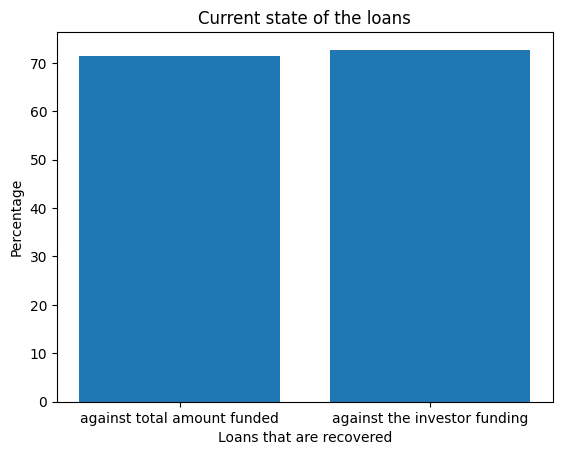

In [5]:
import numpy as np
import matplotlib.pyplot as plot

x = ["against total amount funded", "against the investor funding"]
y = [perc_recovered_funded_amount, perc_recovered_funded_amount_inv]

plot.bar(x, y)
plot.xlabel("Loans that are recovered")
plot.ylabel("Percentage")
plot.title("Current state of the loans")
plot.show()

Additionally visualise what percentage of the total amount would be recovered up to 6 months' in the future.

In [6]:
instalment_no_int_sum = round(m4_df["instalment_no_int"].sum(), 2)
print(f'The total of all monthly instalments without the interest: {instalment_no_int_sum}')

instalment_no_int_inv_sum = round(m4_df["instalment_no_int_inv"].sum(), 2)
print(f'The total of all monthly instalments without the interest that are funded by investors: {instalment_no_int_inv_sum}')

The total of all monthly instalments without the interest: 17120393.33
The total of all monthly instalments without the interest that are funded by investors: 16788988.99


In [7]:
perc_recovered_funded_amount_1 = round((((total_rec_prncp_sum + instalment_no_int_sum) / funded_amount_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_1} percent of the loans that are recovered against total amount funded up to 1 month in the future.')

perc_recovered_funded_amount_2 = round((((total_rec_prncp_sum + (instalment_no_int_sum * 2)) / funded_amount_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_2} percent of the loans that are recovered against total amount funded up to 2 months in the future.')

perc_recovered_funded_amount_3 = round((((total_rec_prncp_sum + (instalment_no_int_sum * 3)) / funded_amount_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_3} percent of the loans that are recovered against total amount funded up to 3 months in the future.')

perc_recovered_funded_amount_4 = round((((total_rec_prncp_sum + (instalment_no_int_sum * 4)) / funded_amount_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_4} percent of the loans that are recovered against total amount funded up to 4 months in the future.')

perc_recovered_funded_amount_5 = round((((total_rec_prncp_sum + (instalment_no_int_sum * 5)) / funded_amount_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_5} percent of the loans that are recovered against total amount funded up to 5 months in the future.')

perc_recovered_funded_amount_6 = round((((total_rec_prncp_sum + (instalment_no_int_sum * 6)) / funded_amount_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_6} percent of the loans that are recovered against total amount funded up to 6 months in the future.')

73.9 percent of the loans that are recovered against total amount funded up to 1 month in the future.
76.3 percent of the loans that are recovered against total amount funded up to 2 months in the future.
78.7 percent of the loans that are recovered against total amount funded up to 3 months in the future.
81.2 percent of the loans that are recovered against total amount funded up to 4 months in the future.
83.6 percent of the loans that are recovered against total amount funded up to 5 months in the future.
86.0 percent of the loans that are recovered against total amount funded up to 6 months in the future.


In [8]:
perc_recovered_funded_amount_inv_1 = round((((total_rec_prncp_sum + instalment_no_int_inv_sum) / funded_amount_inv_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_inv_1} percent of the loans that are recovered against the total amount funded by investors up to 1 month in the future.')

perc_recovered_funded_amount_inv_2 = round((((total_rec_prncp_sum + (instalment_no_int_inv_sum *2))/ funded_amount_inv_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_inv_2} percent of the loans that are recovered against the total amount funded by investors up to 2 months in the future.')

perc_recovered_funded_amount_inv_3 = round((((total_rec_prncp_sum + (instalment_no_int_inv_sum *3))/ funded_amount_inv_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_inv_3} percent of the loans that are recovered against the total amount funded by investors up to 3 months in the future.')

perc_recovered_funded_amount_inv_4 = round((((total_rec_prncp_sum + (instalment_no_int_inv_sum *4))/ funded_amount_inv_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_inv_4} percent of the loans that are recovered against the total amount funded by investors up to 4 months in the future.')

perc_recovered_funded_amount_inv_5 = round((((total_rec_prncp_sum + (instalment_no_int_inv_sum *5))/ funded_amount_inv_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_inv_5} percent of the loans that are recovered against the total amount funded by investors up to 5 months in the future.')

perc_recovered_funded_amount_inv_6 = round((((total_rec_prncp_sum + (instalment_no_int_inv_sum *6))/ funded_amount_inv_sum) * 100), 1)
print(f'{perc_recovered_funded_amount_inv_6} percent of the loans that are recovered against the total amount funded by investors up to 6 months in the future.')

75.1 percent of the loans that are recovered against the total amount funded by investors up to 1 month in the future.
77.4 percent of the loans that are recovered against the total amount funded by investors up to 2 months in the future.
79.8 percent of the loans that are recovered against the total amount funded by investors up to 3 months in the future.
82.2 percent of the loans that are recovered against the total amount funded by investors up to 4 months in the future.
84.6 percent of the loans that are recovered against the total amount funded by investors up to 5 months in the future.
87.0 percent of the loans that are recovered against the total amount funded by investors up to 6 months in the future.


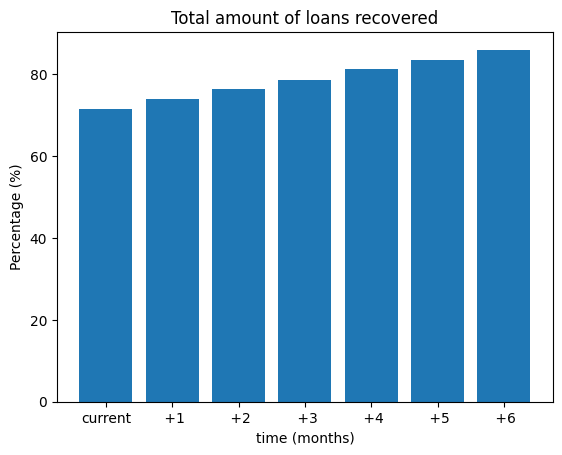

In [9]:
x = ["current", " +1", " +2", " +3", " +4", " +5", " +6"]
y = [perc_recovered_funded_amount, perc_recovered_funded_amount_1, perc_recovered_funded_amount_2, perc_recovered_funded_amount_3, perc_recovered_funded_amount_4, perc_recovered_funded_amount_5, perc_recovered_funded_amount_6]

plot.bar(x, y)
plot.xlabel("time (months)")
plot.ylabel("Percentage (%)")
plot.title("Total amount of loans recovered")
plot.show()

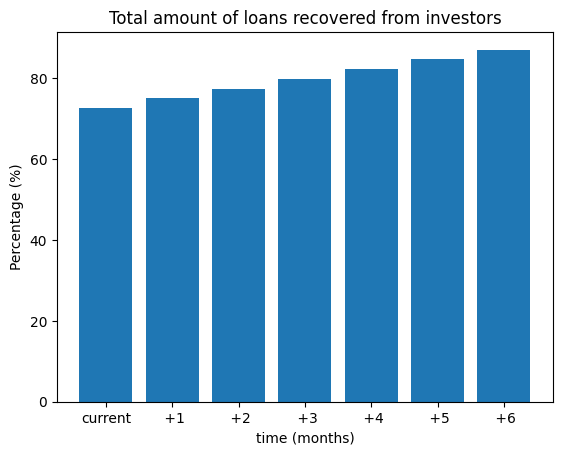

In [10]:
x = ["current", " +1", " +2", " +3", " +4", " +5", " +6"]
y = [perc_recovered_funded_amount_inv, perc_recovered_funded_amount_inv_1, perc_recovered_funded_amount_inv_2, perc_recovered_funded_amount_inv_3, perc_recovered_funded_amount_inv_4, perc_recovered_funded_amount_inv_5, perc_recovered_funded_amount_inv_6]

plot.bar(x, y)
plot.xlabel("time (months)")
plot.ylabel("Percentage (%)")
plot.title("Total amount of loans recovered from investors")
plot.show()

### 2. Calculating Loss
The company wants to check what percentage of loans have been a loss to the company:
<br>
Loans marked as Charged Off in the loan_status column represent a loss to the company.
<br>
<br>
Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [11]:
m4_df["loan_status"].value_counts()

loan_status
Fully Paid            27977
Current               19267
Charged Off            5853
Late (31-120 days)      580
In Grace Period         265
Late (16-30 days)       106
Default                  52
Name: count, dtype: int64

In [34]:
charged_off_loans_df = m4_df[m4_df['loan_status'].isin(['Charged Off'])]
print(f'The number of loans that are charged off: {charged_off_loans_df["loan_status"].count()}\n') #Can see the number of loans that are charged off. 

charged_off_loans_df["out_revenue"].head(10)

not_charged_off_loans_df = m4_df[m4_df['loan_status'].isin(['Fully Paid', 'Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default'])]
print(f'The number of loans that are not charged off: {not_charged_off_loans_df["loan_status"].count()}') #The number of loans that are not charged off.

The number of loans that are charged off: 5853

The number of loans that are not charged off: 48247


In [37]:
charged_off_loans_df[""].head(10)

7      701.95
56     275.29
83      47.34
90     302.85
117    235.83
138    435.43
149    820.03
190    363.97
209    104.87
314    302.94
Name: instalment, dtype: float64

In [15]:
pd.set_option("display.max_rows", None)
charged_off_loans_df["last_payment_date"].value_counts(sort=False)

last_payment_date
2021-08-01    118
2021-07-01    224
2021-03-01    165
2021-04-01    176
2021-05-01    166
2021-06-01    175
2021-02-01    142
2021-09-01     49
2021-10-01     19
2021-11-01     14
2020-06-01    161
2021-01-01    138
2020-12-01    178
2020-01-01     91
2020-11-01    153
2020-08-01    170
2020-04-01    130
2020-07-01    171
2020-09-01    171
2020-05-01    126
2020-10-01    190
2020-02-01     94
2020-03-01    127
2021-12-01      6
2019-12-01     78
2022-01-01      2
2019-11-01     65
2019-10-01     58
2019-09-01     53
2018-10-01     86
2019-07-01     69
2018-08-01     85
2019-08-01     45
2018-03-01     73
2018-06-01     70
2019-04-01     66
2018-07-01     79
2018-01-01     65
2018-09-01     67
2019-02-01     51
2018-02-01     80
2019-03-01     38
2019-06-01     43
2018-04-01     55
2019-05-01     53
2018-12-01     55
2019-01-01     59
2018-11-01     68
2018-05-01     63
2017-12-01     66
2017-11-01     50
2017-10-01     65
2017-09-01     63
2017-08-01     53
2017-06-01

Sorting charged off loans historically (by year):
 - **2013:** 1 loan
 - **2014:** 87 loans
 - **2015:** 176 loans
 - **2016:** 337 loans
 - **2017:** 572 loans
 - **2018:** 846 loans
 - **2019:** 678 loans
 - **2020:** 1762 loans
 - **2021:** 1392 loans
 - **2022:** 2 loans</ul>

In [16]:
not_charged_off_loans_df["last_payment_date"].value_counts(sort=False)

last_payment_date
2022-01-01    15565
2021-10-01      841
2021-06-01      648
2021-03-01      646
2021-05-01      583
2021-09-01      773
2021-07-01      789
2021-02-01      609
2021-11-01      770
2021-12-01     5034
2021-01-01      688
2021-08-01      651
2021-04-01      610
2020-04-01      601
2020-05-01      629
2020-11-01      621
2020-09-01      725
2020-07-01      803
2020-10-01      830
2020-08-01      826
2020-02-01      585
2020-06-01      749
2020-03-01      690
2020-12-01      844
2020-01-01      584
2019-12-01      498
2019-11-01      398
2019-10-01      356
2019-09-01      320
2018-07-01      282
2018-09-01      326
2019-06-01      289
2019-03-01      455
2019-07-01      339
2018-02-01      298
2019-01-01      360
2018-10-01      331
2019-05-01      431
2018-01-01      219
2018-08-01      314
2018-11-01      313
2018-03-01      377
2019-02-01      380
2019-04-01      384
2018-12-01      286
2018-04-01      304
2019-08-01      312
2018-05-01      318
2018-06-01      288
20

Sorting loans that are not charged off historically (by year):
 - **2014:** 71 loans
 - **2015:** 229 loans
 - **2016:** 840 loans
 - **2017:** 2235 loans
 - **2018:** 3656 loans
 - **2019:** 4522 loans
 - **2020:** 8487 loans
 - **2021:** 12642 loans
 - **2022:** 15565 loans</ul>

Sorting total number of loans historically (by year):
 - **2013:** 1 loan
 - **2014:** 158 loans
 - **2015:** 405 loans
 - **2016:** 1177 loans
 - **2017:** 2807 loans
 - **2018:** 4502 loans
 - **2019:** 5200 loans
 - **2020:** 10249 loans
 - **2021:** 14034 loans
 - **2022:** 15567 loans</ul>
<br>
For the future calculations we will not be using year 2013 and 2022 values it is missing values for majority of the months. We will use the values from 2014-2021 years as year of those years contain values collected for each month. 

In [17]:
charged_off_2014_percent = round(((87 / 158) * 100), 2)
print(f'{charged_off_2014_percent} percent of loans were charged off in 2014\n')

charged_off_2015_percent = round(((176 / 405) * 100), 2)
print(f'{charged_off_2015_percent} percent of loans were charged off in 2015\n')

charged_off_2016_percent = round(((337 / 1177) * 100), 2)
print(f'{charged_off_2016_percent} percent of loans were charged off in 2016\n')

charged_off_2017_percent = round(((572 / 2807) * 100), 2)
print(f'{charged_off_2017_percent} percent of loans were charged off in 2017\n')

charged_off_2018_percent = round(((846 / 4502) * 100), 2)
print(f'{charged_off_2018_percent} percent of loans were charged off in 2018\n')

charged_off_2019_percent = round(((678 / 5200) * 100), 2)
print(f'{charged_off_2019_percent} percent of loans were charged off in 2019\n')

charged_off_2020_percent = round(((1762 / 10249) * 100), 2)
print(f'{charged_off_2020_percent} percent of loans were charged off in 2020\n')

charged_off_2021_percent = round(((1392 / 14034) * 100), 2)
print(f'{charged_off_2021_percent} percent of loans were charged off in 2021\n')

55.06 percent of loans were charged off in 2014

43.46 percent of loans were charged off in 2015

28.63 percent of loans were charged off in 2016

20.38 percent of loans were charged off in 2017

18.79 percent of loans were charged off in 2018

13.04 percent of loans were charged off in 2019

17.19 percent of loans were charged off in 2020

9.92 percent of loans were charged off in 2021



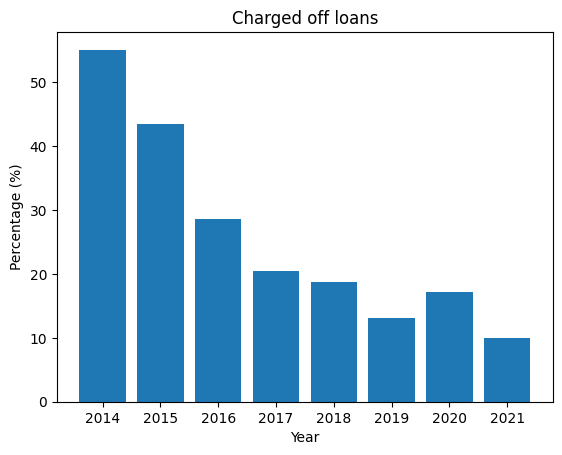

In [18]:
x = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
y = [charged_off_2014_percent, charged_off_2015_percent, charged_off_2016_percent, charged_off_2017_percent, charged_off_2018_percent, charged_off_2019_percent, charged_off_2020_percent, charged_off_2021_percent]

plot.bar(x, y)
plot.xlabel("Year")
plot.ylabel("Percentage (%)")
plot.title("Charged off loans")
plot.show()

The graph shows that loss has been decreasing rapidly over years. 

the total amount that was paid towards these loans before being charged off

In [19]:
charged_off_df_2014 = charged_off_loans_df[charged_off_loans_df['last_payment_date'].isin(['2014-01-01', '2014-02-01','2014-03-01','2014-04-01','2014-05-01','2014-06-01','2014-07-01','2014-08-01','2014-09-01','2014-10-01','2014-11-01','2014-12-01'])]
total_charged_off_payment_2014 = round(charged_off_df_2014["total_payment"].sum(), 2)
print(f'The total amount that was paid for the loans before being charged off in 2014: {total_charged_off_payment_2014}')

The total amount that was paid for the loans before being charged off in 2014: 246573.84


In [20]:
charged_off_df_2015 = charged_off_loans_df[charged_off_loans_df['last_payment_date'].isin(['2015-01-01', '2015-02-01','2015-03-01','2015-04-01','2015-05-01','2015-06-01','2015-07-01','2015-08-01','2015-09-01','2015-10-01','2015-11-01','2015-12-01'])]
total_charged_off_payment_2015 = round(charged_off_df_2015["total_payment"].sum(), 2)
print(f'The total amount that was paid for the loan before being charged off in 2015: {total_charged_off_payment_2015}')

The total amount that was paid for the loan before being charged off in 2015: 716909.61


In [21]:
charged_off_df_2016 = charged_off_loans_df[charged_off_loans_df['last_payment_date'].isin(['2016-01-01', '2016-02-01','2016-03-01','2016-04-01','2016-05-01','2016-06-01','2016-07-01','2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01'])]
total_charged_off_payment_2016 = round(charged_off_df_2016["total_payment"].sum(), 2)
print(f'The total amount that was paid for the loan before being charged off in 2016: {total_charged_off_payment_2016}')

The total amount that was paid for the loan before being charged off in 2016: 1430101.99


In [22]:
charged_off_df_2017 = charged_off_loans_df[charged_off_loans_df['last_payment_date'].isin(['2017-01-01', '2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01'])]
total_charged_off_payment_2017 = round(charged_off_df_2017["total_payment"].sum(), 2)
print(f'The total amount that was paid for the loan before being charged off in 2017: {total_charged_off_payment_2017}')

The total amount that was paid for the loan before being charged off in 2017: 2404380.88


In [23]:
charged_off_df_2018 = charged_off_loans_df[charged_off_loans_df['last_payment_date'].isin(['2018-01-01', '2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01'])]
total_charged_off_payment_2018 = round(charged_off_df_2018["total_payment"].sum(), 2)
print(f'The total amount that was paid for the loan before being charged off in 2018: {total_charged_off_payment_2018}')

The total amount that was paid for the loan before being charged off in 2018: 4533699.91


In [24]:
charged_off_df_2019 = charged_off_loans_df[charged_off_loans_df['last_payment_date'].isin(['2019-01-01', '2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01'])]
total_charged_off_payment_2019 = round(charged_off_df_2019["total_payment"].sum(), 2)
print(f'The total amount that was paid for the loan before being charged off in 2019: {total_charged_off_payment_2019}')

The total amount that was paid for the loan before being charged off in 2019: 5268936.5


In [25]:
charged_off_df_2020 = charged_off_loans_df[charged_off_loans_df['last_payment_date'].isin(['2020-01-01', '2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01'])]
total_charged_off_payment_2020 = round(charged_off_df_2020["total_payment"].sum(), 2)
print(f'The total amount that was paid for the loan before being charged off in 2020: {total_charged_off_payment_2020}')

The total amount that was paid for the loan before being charged off in 2020: 11621501.68


In [26]:
charged_off_df_2021 = charged_off_loans_df[charged_off_loans_df['last_payment_date'].isin(['2021-01-01', '2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01','2021-12-01'])]
total_charged_off_payment_2021 = round(charged_off_df_2021["total_payment"].sum(), 2)
print(f'The total amount that was paid for the loan before being charged off in 2021: {total_charged_off_payment_2021}')

The total amount that was paid for the loan before being charged off in 2021: 12837557.83


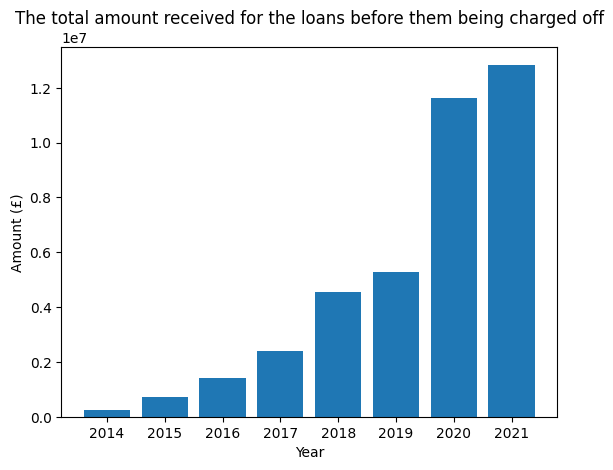

In [27]:
x = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
y = [total_charged_off_payment_2014, total_charged_off_payment_2015, total_charged_off_payment_2016, total_charged_off_payment_2017, total_charged_off_payment_2018, total_charged_off_payment_2019, total_charged_off_payment_2020, total_charged_off_payment_2021]

plot.bar(x, y)
plot.xlabel("Year")
plot.ylabel("Amount (£)")
plot.title("The total amount received for the loans before them being charged off")
plot.show()

### 3. Calculating Projected Loss
Calculate the projected loss of the loans marked as Charged Off.
<br>
<br>
Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualise the loss projected over the remaining term of these loans.

remaining term for one loan *  instalment = remaining amount that would have been paid off.
sum (all the remaining amounts that would have been paid off)

------------------------------------code below copies from the tasks above for the purpose of showing support team-----------------------------

In [39]:
import pandas as pd

m4_df = pd.read_csv("C:/Users/eveli/ai_core/EDA/lp_m4.csv")

In [40]:
m4_df["instalment_no_int"] = m4_df["funded_amount"] / m4_df["term"]

m4_df["out_term"] = m4_df["out_prncp"] / m4_df["instalment_no_int"]

m4_df["out_revenue"] = m4_df["out_term"] * m4_df["instalment"]

m4_df["out_revenue"].head(10)

0     6191.549793
1    10117.050768
2        0.000000
3        0.000000
4    11282.896689
5     2185.819856
6        0.000000
7        0.000000
8    11575.424441
9     6537.622433
Name: out_revenue, dtype: float64

In [42]:
charged_off_loans_df = m4_df[m4_df['loan_status'].isin(['Charged Off'])]

charged_off_loans_df["out_revenue"].head(10)

7      0.0
56     0.0
83     0.0
90     0.0
117    0.0
138    0.0
149    0.0
190    0.0
209    0.0
314    0.0
Name: out_revenue, dtype: float64

------------------------------------------------------------------------------------------------------------------

In [28]:
out_revenue_sum_charged_off = charged_off_loans_df["out_revenue"].sum()
print(f'The total loss in revenue from loans if they would have finished their term: {out_revenue_sum_charged_off}')

The total loss in revenue from loans if they would have finished their term: 0.0


In [ ]:
charged_off_loans_df.info()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(style="darkgrid")

sns.scatterplot(data=charged_off_loans_df, x="out_revenue", y="out_term")

In [ ]:
charged_off_loans_df["out_term"].tail(100)